In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df = pd.read_csv(r"C:\Users\dharn\Downloads\Customer Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replace blanks with 0 as tenure is 0 and no total charges are recorded

In [112]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df.isnull().sum().sum()

0

In [115]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [116]:
df["customerID"].duplicated().sum()

0

In [117]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)   

In [118]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#converted 0 or 1 values of senior citizen to yes/no to makes it easier to understand

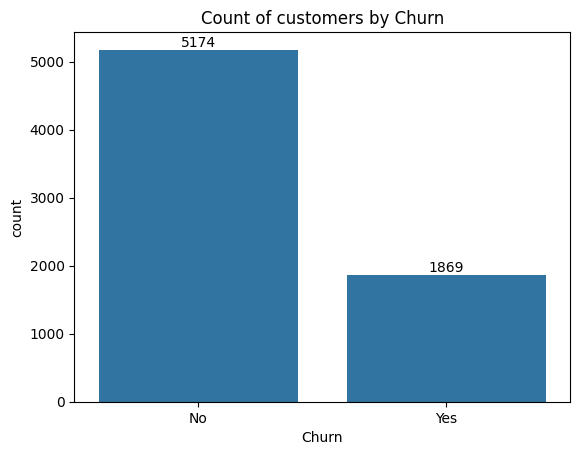

In [119]:
ax = sns.countplot(x = 'Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

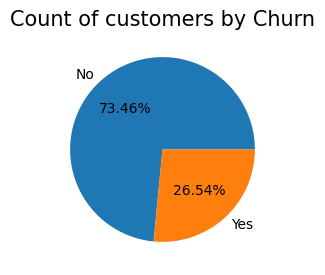

In [120]:
plt.figure(figsize=(3,3))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.title("Count of customers by Churn",fontsize = 15)
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()


#from the given pie chart we can conclude that 26.54% of our customers have churneed out.not let's explore the reason behind it

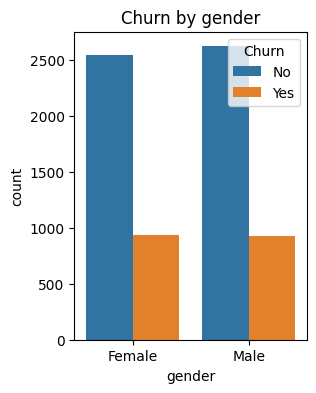

In [121]:
plt.figure(figsize=(3,4))
sns.countplot(x= "gender", data=df,hue = "Churn")
plt.title("Churn by gender")
plt.show()

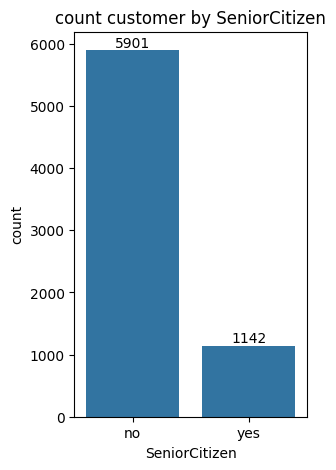

In [122]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x= "SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("count customer by SeniorCitizen")
plt.show()

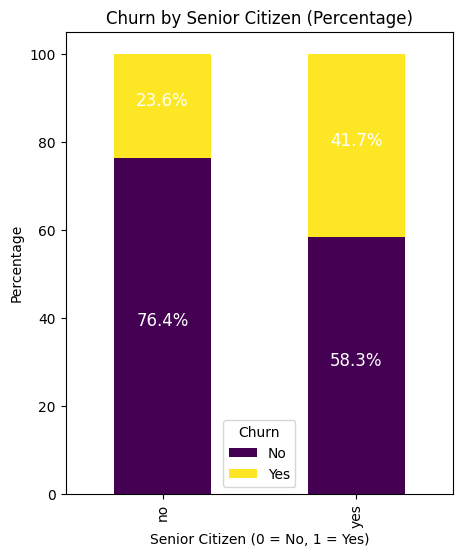

In [123]:
total_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentages
percentage_df = total_counts.div(total_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
percentage_df.plot(kind='bar', stacked=True, figsize=(5, 6), colormap="viridis")

# Add percentage labels
for i, (index, row) in enumerate(percentage_df.iterrows()):
    cumulative = 0
    for churn_status, value in row.items():
        plt.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', color='white', fontsize=12)
        cumulative += value

# Formatting
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

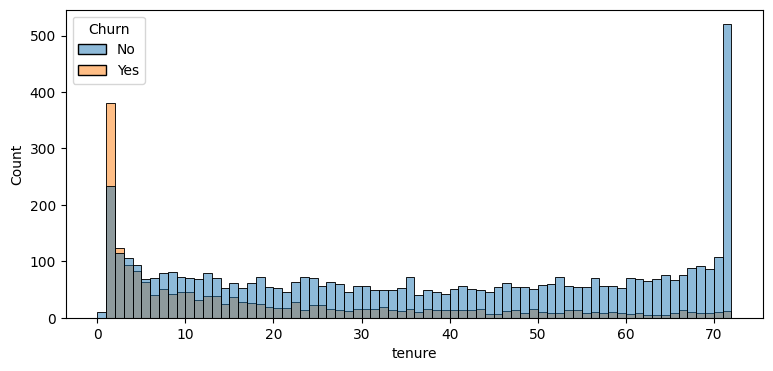

In [124]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins=72, hue= "Churn")
plt.show()

#people who have used our service for a long time have stayed and people who have used our services #1 or 2 months have churned

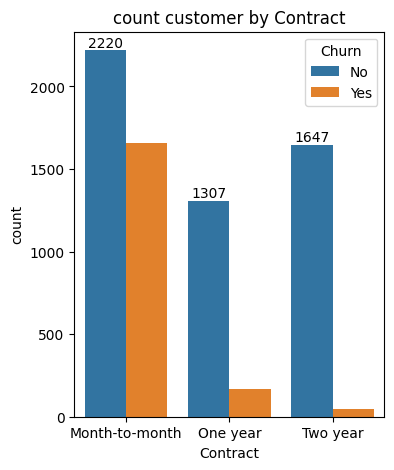

In [125]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x= "Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("count customer by Contract")
plt.show()

#people who have month to month contract are likly to churn then from those who have 1 or 2 year or contract

In [126]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

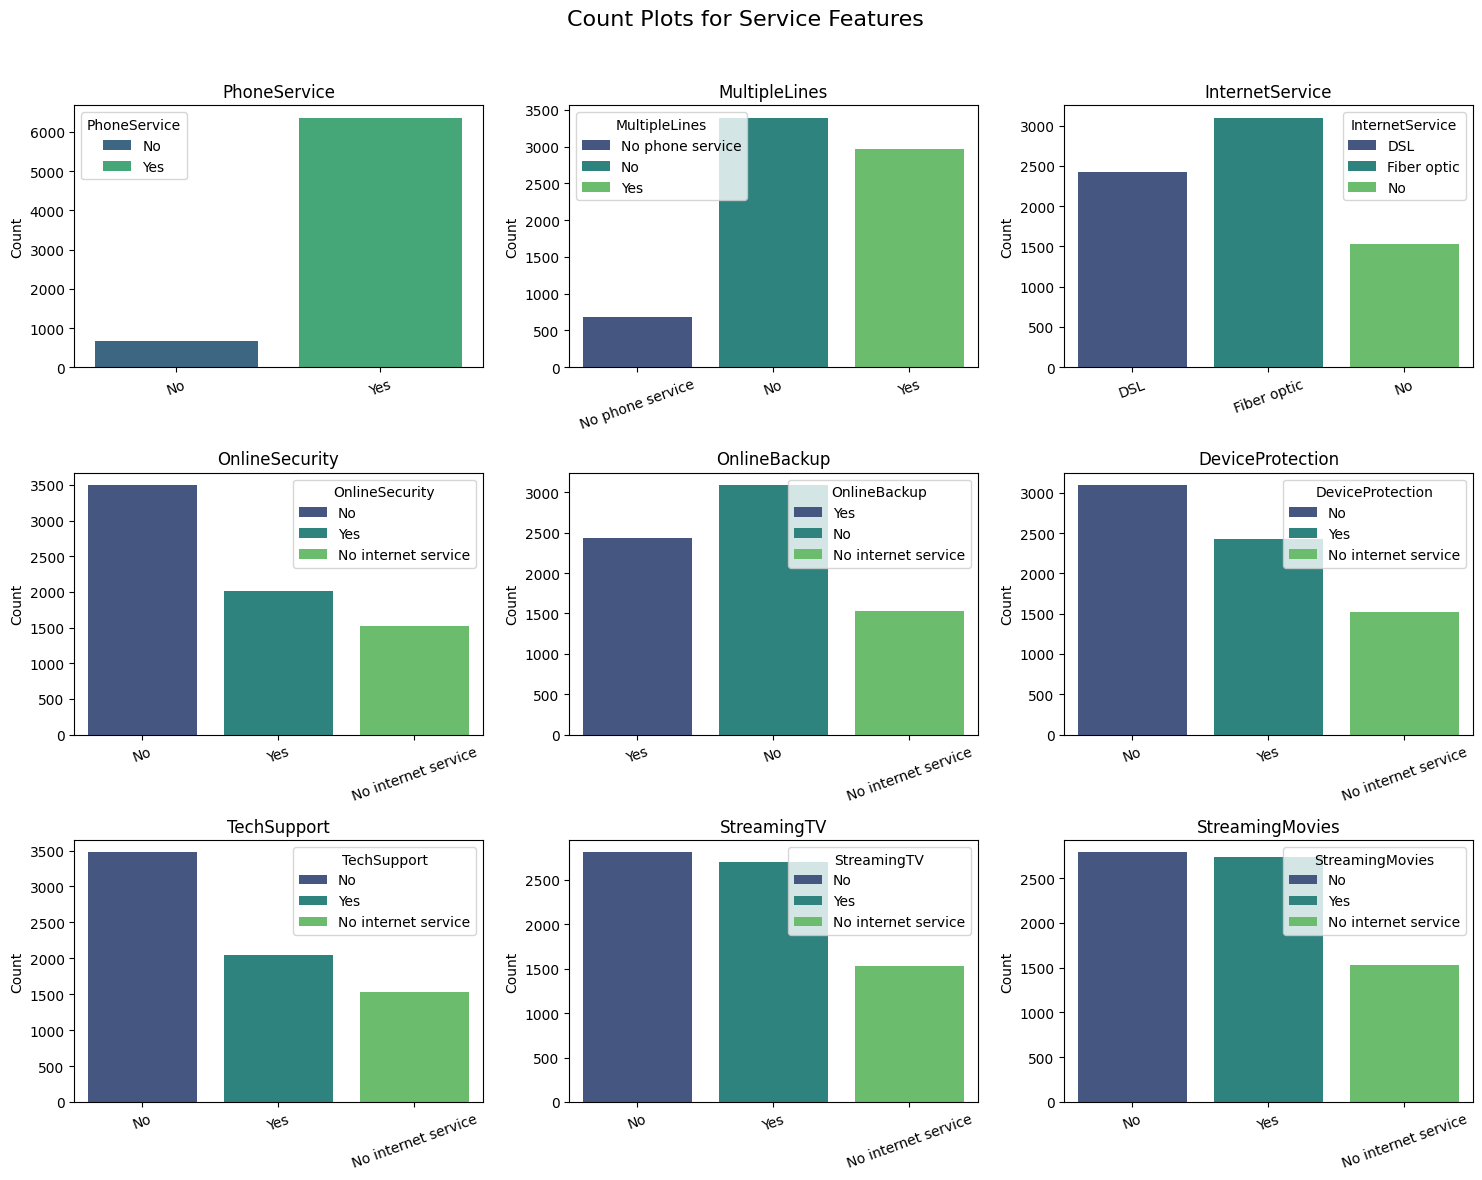

In [127]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Count Plots for Service Features", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(x=df[col], hue=df[col], ax=axes[i], palette="viridis", legend=True)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=20)  # Rotate x-axis labels for readability

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

#This dataset contains customer service subscription details across various telecom services, including PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. It categorizes customers based on whether they have subscribed to these services, using labels like "Yes," "No," "DSL," and "Fiber optic." The data can help analyze customer preferences, identify trends, and understand factors influencing service adoption.

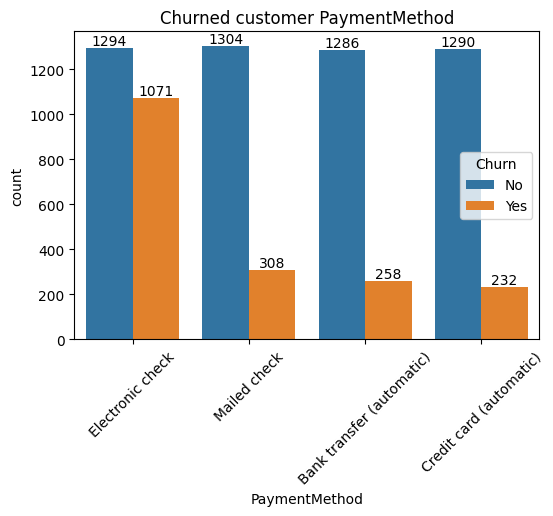

In [132]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'PaymentMethod', data=df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customer PaymentMethod")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method